In [1]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("breast.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
df.drop("id" , axis = 1 , inplace=True)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
df.isna().sum().sum()

0

In [7]:
df.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [8]:
df.diagnosis = df.diagnosis.replace(["M" , "B"] , [0 , 1]) # 0 = kötü huylu kanser , 1 = iyi huylu kanser 
df.diagnosis.unique()

array([0, 1], dtype=int64)

In [9]:
df.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.627417,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,1.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [10]:
df.diagnosis.value_counts()

1    357
0    212
Name: diagnosis, dtype: int64

In [11]:
## sns.heatmap(df.corr() , annot = True , fmt = ".2f" ,linewidths= 0.4 ); 
# heatmap ile yazdırdığımızda çok fazla column olduğu için değerlere doğru bakamıyoruz.

In [12]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2 , random_state=61)

In [13]:
x = df.drop("diagnosis" , axis=1)
y = df.diagnosis

In [14]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius_mean              569 non-null    float64
 1   texture_mean             569 non-null    float64
 2   perimeter_mean           569 non-null    float64
 3   area_mean                569 non-null    float64
 4   smoothness_mean          569 non-null    float64
 5   compactness_mean         569 non-null    float64
 6   concavity_mean           569 non-null    float64
 7   concave points_mean      569 non-null    float64
 8   symmetry_mean            569 non-null    float64
 9   fractal_dimension_mean   569 non-null    float64
 10  radius_se                569 non-null    float64
 11  texture_se               569 non-null    float64
 12  perimeter_se             569 non-null    float64
 13  area_se                  569 non-null    float64
 14  smoothness_se            5

In [15]:
y.value_counts()

1    357
0    212
Name: diagnosis, dtype: int64

In [16]:
pca_result =pca.fit_transform(x)
pca_df = pd.DataFrame(pca_result , columns=["Comp1" , "Comp2"]) 

pca_df["diagnosis"] = y
pca_df

,Comp1,Comp2,diagnosis
0,1160.142574,-293.917544,0
1,1269.122443,15.630182,0
2,995.793889,39.156743,0
3,-407.180803,-67.380320,0
4,930.341180,189.340742,0
...,...,...,...
564,1414.126684,110.222492,0
565,1045.018854,77.057589,0
566,314.501756,47.553525,0
567,1124.858115,34.129225,0


<Axes: xlabel='Comp1', ylabel='Comp2'>

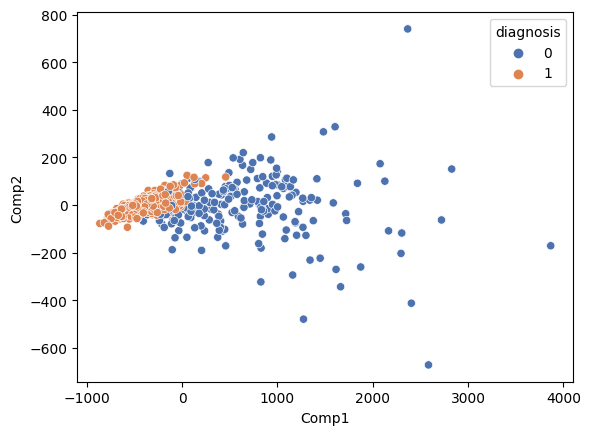

In [17]:
sns.scatterplot(data = pca_df , x = "Comp1" , y = "Comp2" , palette="deep" , hue="diagnosis")

# Model kurulumu

In [19]:
from sklearn.model_selection import train_test_split

In [21]:
x_train , x_test , y_train , y_test = train_test_split(x, y, test_size=0.2, random_state=61)

In [26]:
x_train

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  compactness_mean  concavity_mean  concave points_mean  symmetry_mean  fractal_dimension_mean  radius_se  texture_se  perimeter_se  area_se  smoothness_se  compactness_se  concavity_se  concave points_se  symmetry_se  fractal_dimension_se  radius_worst  texture_worst  perimeter_worst  area_worst  smoothness_worst  compactness_worst  concavity_worst  concave points_worst  symmetry_worst  fractal_dimension_worst
6.981        13.43         43.79           143.5      0.11700          0.07568           0.00000         0.000000             0.1930         0.07818                 0.2241     1.5080      1.553         9.833    0.010190       0.010840        0.000000      0.000000           0.02659      0.004100              7.93          19.54          50.41            185.2       0.1584            0.12020            0.00000          0.00000               0.2932          0.09382                    1
14.470       24.99         

In [23]:
x_test

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
102,12.18,20.52,77.22,458.7,0.08013,0.04038,0.02383,0.017700,0.1739,0.05677,...,13.34,32.84,84.58,547.8,0.11230,0.08862,0.1145,0.07431,0.2694,0.06878
378,13.66,15.15,88.27,580.6,0.08268,0.07548,0.04249,0.024710,0.1792,0.05897,...,14.54,19.64,97.96,657.0,0.12750,0.31040,0.2569,0.10540,0.3387,0.09638
12,19.17,24.80,132.40,1123.0,0.09740,0.24580,0.20650,0.111800,0.2397,0.07800,...,20.96,29.94,151.70,1332.0,0.10370,0.39030,0.3639,0.17670,0.3176,0.10230
387,13.88,16.16,88.37,596.6,0.07026,0.04831,0.02045,0.008507,0.1607,0.05474,...,15.51,19.97,99.66,745.3,0.08484,0.12330,0.1091,0.04537,0.2542,0.06623
44,13.17,21.81,85.42,531.5,0.09714,0.10470,0.08259,0.052520,0.1746,0.06177,...,16.23,29.89,105.50,740.7,0.15030,0.39040,0.3728,0.16070,0.3693,0.09618
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
478,11.49,14.59,73.99,404.9,0.10460,0.08228,0.05308,0.019690,0.1779,0.06574,...,12.40,21.90,82.04,467.6,0.13520,0.20100,0.2596,0.07431,0.2941,0.09180
172,15.46,11.89,102.50,736.9,0.12570,0.15550,0.20320,0.109700,0.1966,0.07069,...,18.79,17.04,125.00,1102.0,0.15310,0.35830,0.5830,0.18270,0.3216,0.10100
30,18.63,25.11,124.80,1088.0,0.10640,0.18870,0.23190,0.124400,0.2183,0.06197,...,23.15,34.01,160.50,1670.0,0.14910,0.42570,0.6133,0.18480,0.3444,0.09782
122,24.25,20.20,166.20,1761.0,0.14470,0.28670,0.42680,0.201200,0.2655,0.06877,...,26.02,23.99,180.90,2073.0,0.16960,0.42440,0.5803,0.22480,0.3222,0.08009


In [33]:
y.value_counts()

1    357
0    212
Name: diagnosis, dtype: int64

In [30]:
y_train.value_counts()

1    289
0    166
Name: diagnosis, dtype: int64

In [25]:
y_test

102    1
378    1
12     0
387    1
44     0
      ..
478    1
172    0
30     0
122    0
521    0
Name: diagnosis, Length: 114, dtype: int64

In [34]:
from sklearn.tree import DecisionTreeClassifier

In [85]:
df.shape

(569, 31)

In [73]:
model = DecisionTreeClassifier(criterion = "gini" , 
                               splitter = "best" , 
                               max_depth = 9, 
                               min_samples_split = 3 , 
                               max_features = 5,
                               random_state = 61)

In [74]:
model.fit(x_train , y_train)

DecisionTreeClassifier(max_depth=9, max_features=5, min_samples_split=3,
                       random_state=61)

In [75]:
y_pred = model.predict(x_test)
y_pred

array([1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0], dtype=int64)

In [76]:
np.array(y_test)

array([1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0], dtype=int64)

In [77]:
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix

In [78]:
accuracy_score(y_test , y_pred)

0.9298245614035088

In [79]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.95      0.87      0.91        46
           1       0.92      0.97      0.94        68

    accuracy                           0.93       114
   macro avg       0.93      0.92      0.93       114
weighted avg       0.93      0.93      0.93       114



In [80]:
confusion_matrix(y_test , y_pred)

array([[40,  6],
       [ 2, 66]], dtype=int64)